Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [40]:
import pandas as pd
bank = pd.read_csv('../../../Downloads/bank_cleaned.csv')

In [41]:
bank.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [42]:
bank['response'].value_counts()

no     36202
yes     4639
Name: response, dtype: int64

In [43]:
bank['response_binary'].value_counts()

0    36202
1     4639
Name: response_binary, dtype: int64

In [44]:
bank.isnull().sum()

Unnamed: 0         0
age                0
job                0
marital            0
education          0
default            0
balance            0
housing            0
loan               0
day                0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
response           0
response_binary    0
dtype: int64

In [45]:
bank = bank.drop(['response','Unnamed: 0'],axis =1 )


In [46]:
y = bank['response_binary']
y.nunique()


2

In [47]:
# different values of y
y.value_counts(normalize=True)

0    0.886413
1    0.113587
Name: response_binary, dtype: float64

In [48]:
X = bank.drop('response_binary',axis=1)

In [49]:
bank.shape

(40841, 16)

In [ ]:
# preicion is worth calculating --as it i predict existimng customer will say yes 
# for the term deposit which is my y variable & actually they do sign up for the term deposit then it is good for business.
#  for my case study i want my precision to be high.

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

X_train.shape, X_val.shape,X_test.shape
    

((26137, 15), (6535, 15), (8169, 15))

In [53]:
# as precision is good for my model so i calculated precision
# precision score for the validation dataset

from sklearn.metrics import precision_score

# Using Sklearn DummyClassifier
from sklearn.dummy import DummyClassifier

# Fit the DummyClassifier
baseline = DummyClassifier(strategy='stratified')
baseline.fit(X_train, y_train)

# Make predictions on validation data
y_pred = baseline.predict(X_val)
precision_score(y_val, y_pred,average='binary')

0.103397341211226

In [54]:
# precision score for the test dataset

from sklearn.metrics import precision_score

# Using Sklearn DummyClassifier
from sklearn.dummy import DummyClassifier

# Fit the DummyClassifier on training data
baseline = DummyClassifier(strategy='stratified')
baseline.fit(X_train, y_train)

# Make predictions on test data
y_pred = baseline.predict(X_test)
precision_score(y_test, y_pred,average='binary')


0.12341772151898735

In [65]:
# accuracy score in random forest using One Hot encoder


import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs=-1, random_state=42)
)

# Fit on train and score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy:', pipeline.score(X_val, y_val))

/Users/anitasharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation Accuracy: 0.9057383320581485


In [66]:
print('X_train shape before encoding', X_train.shape)

encoder = pipeline.named_steps['onehotencoder']
encoded_df = encoder.transform(X_train)

print('X_train shape after encoding', encoded_df.shape)

X_train shape before encoding (26137, 15)
X_train shape after encoding (26137, 46)


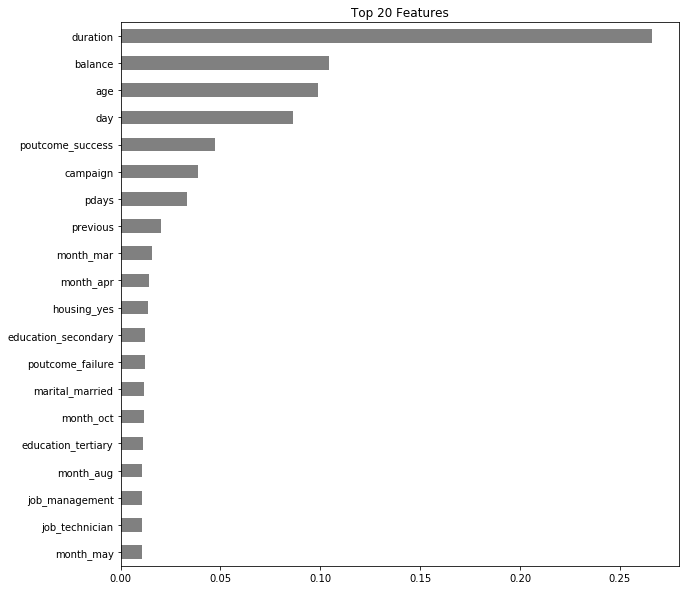

In [67]:



%matplotlib inline
import matplotlib.pyplot as plt

# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded_df.columns)

# Plot top n feature importances
n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} Features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [69]:
# random forest classifier using ordinal encoding


pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs=-1, random_state=42)
)

# Fit on train and score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy:', pipeline.score(X_val, y_val))

/Users/anitasharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation Accuracy: 0.9043611323641928


In [70]:
print('X_train shape before encoding', X_train.shape)

encoder = pipeline.named_steps['ordinalencoder']
encoded_df = encoder.transform(X_train)

print('X_train shape after encoding', encoded_df.shape)

X_train shape before encoding (26137, 15)
X_train shape after encoding (26137, 15)


In [71]:
encoded_df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome
16533,44,1,1,1,1,964,1,1,29,1,2.63,2,-1,0,1
38996,62,2,1,2,1,569,1,1,4,2,1.57,5,184,1,2
26331,38,3,2,1,1,2346,2,1,28,3,5.25,1,-1,0,1
11548,57,4,1,3,1,85,1,1,27,4,3.23,1,-1,0,1
33282,55,5,1,2,1,761,2,1,11,5,0.47,1,-1,0,1


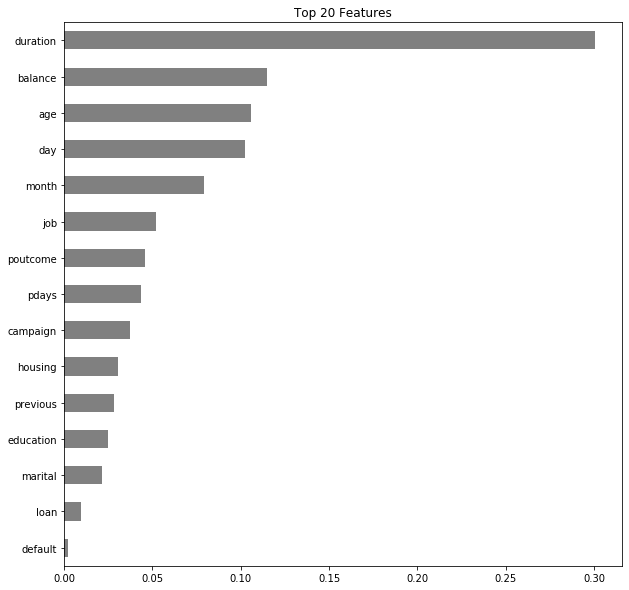

In [72]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded_df.columns)

# Plot top n feature importances
n = 20
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} Features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [ ]:
# Read New York City property sales data
import pandas as pd
df = pd.read_csv(DATA_PATH+'condos/NYC_Citywide_Rolling_Calendar_Sales.csv')

Your code starts here:

In [ ]:
# Change column names: replace spaces with underscores


In [ ]:
# Get Pandas Profiling Report


In [ ]:
# Keep just the subset of data for the Tribeca neighborhood
# Check how many rows you have now. (Should go down from > 20k rows to 146)


In [ ]:
# Q. What's the date range of these property sales in Tribeca?


In [ ]:
# The Pandas Profiling Report showed that SALE_PRICE was read as strings
# Convert it to integers


In [ ]:
# Q. What is the maximum SALE_PRICE in this dataset?


In [ ]:
# Look at the row with the max SALE_PRICE


In [ ]:
# Get value counts of TOTAL_UNITS
# Q. How many property sales were for multiple units?


In [ ]:
# Keep only the single units


In [ ]:
# Q. Now what is the max sales price? How many square feet does it have?


In [ ]:
# Q. How often did $0 sales occur in this subset of the data?

# There's a glossary here: 
# https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

# It says:
# A $0 sale indicates that there was a transfer of ownership without a 
# cash consideration. There can be a number of reasons for a $0 sale including 
# transfers of ownership from parents to children. 



In [ ]:
# Look at property sales for > 5,000 square feet
# Q. What is the highest square footage you see?


In [ ]:
# What are the building class categories?
# How frequently does each occur?


In [ ]:
# Keep subset of rows:
# Sale price more than $0, 
# Building class category = Condos - Elevator Apartments

# Check how many rows you have now. (Should be 106 rows.)


In [ ]:
# Make a Plotly Express scatter plot of GROSS_SQUARE_FEET vs SALE_PRICE


In [ ]:
# Add an OLS (Ordinary Least Squares) trendline,
# to see how the outliers influence the "line of best fit"


In [ ]:
# Look at sales for more than $35 million

# All are at 70 Vestry Street
# All but one have the same SALE_PRICE & SALE_DATE
# Was the SALE_PRICE for each? Or in total?
# Is this dirty data?


In [ ]:
# Make a judgment call:
# Keep rows where sale price was < $35 million

# Check how many rows you have now. (Should be down to 90 rows.)


In [ ]:
# Now that you've removed outliers,
# Look again at a scatter plot with OLS (Ordinary Least Squares) trendline


In [ ]:
# Select these columns, then write to a csv file named tribeca.csv. Don't include the index.
